In [ ]:
#importing the Api key from RoboFlow
!mkdir /content/Park
%cd /content/Park
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aoEpzwbMjrGbgTtzLOYG")
project = rf.workspace("bouakkaz144-lotfi-gmail-com").project("parking-lot-wketa")
version = project.version(5)
dataset = version.download("yolov8")


/content/Park
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to parking-lot-5 in yolov8:: 100%|██████████| 264/264 [00:00<00:00, 7532.17it/s]


In [4]:
#Downloading the Libraries
!pip install  ultralytics
!pip install yolo

  Using cached ultralytics-8.1.28-py3-none-any.whl (721 kB)


In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
#Model Training
!yolo task=detect mode=train model=yolov8x.pt data=/content/Park/parking-lot-5/data.yaml epochs=50 imgsz=650 plots=True

Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Park/parking-lot-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=650, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [9]:
!ls Park/runs/detect/train3/

args.yaml					    P_curve.png       train_batch280.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch281.jpg
confusion_matrix.png				    R_curve.png       train_batch282.jpg
events.out.tfevents.1710507734.cd4a883ace59.5267.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


[Errno 2] No such file or directory: 'Park'
/content/Park


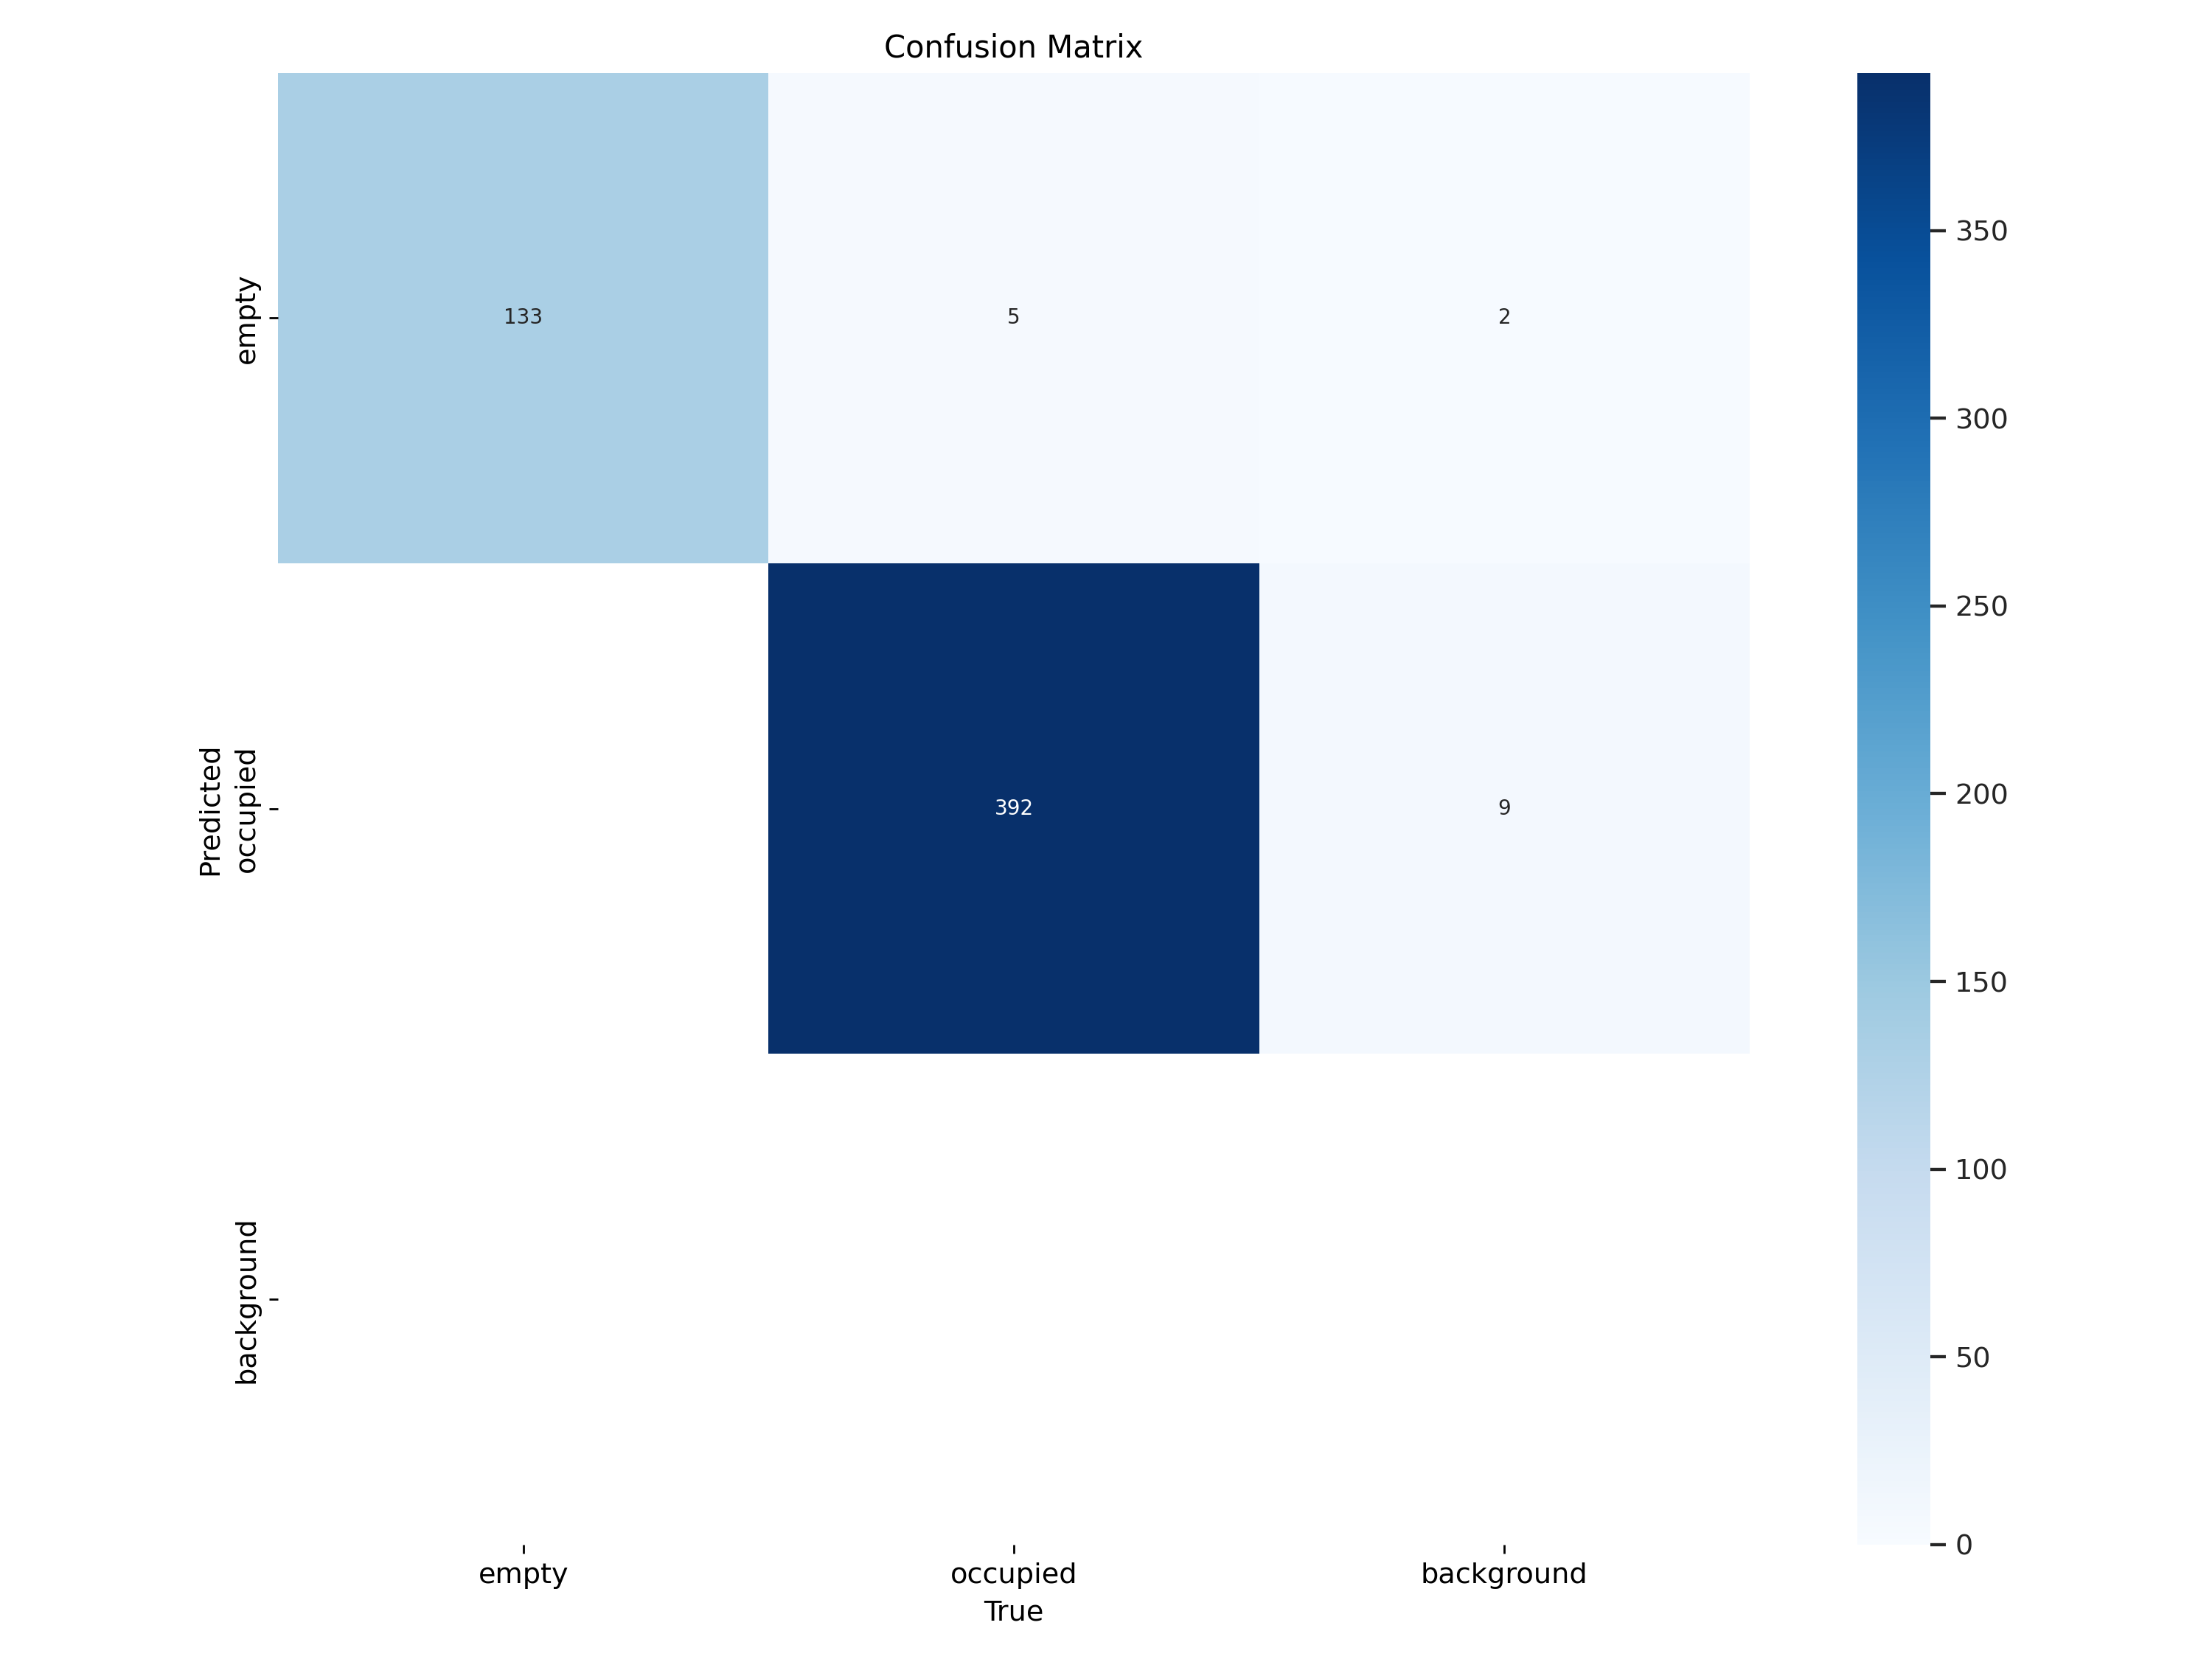

In [14]:
%cd Park
Image(filename=f'/content/Park/runs/detect/train3/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: 'Park'
/content/Park


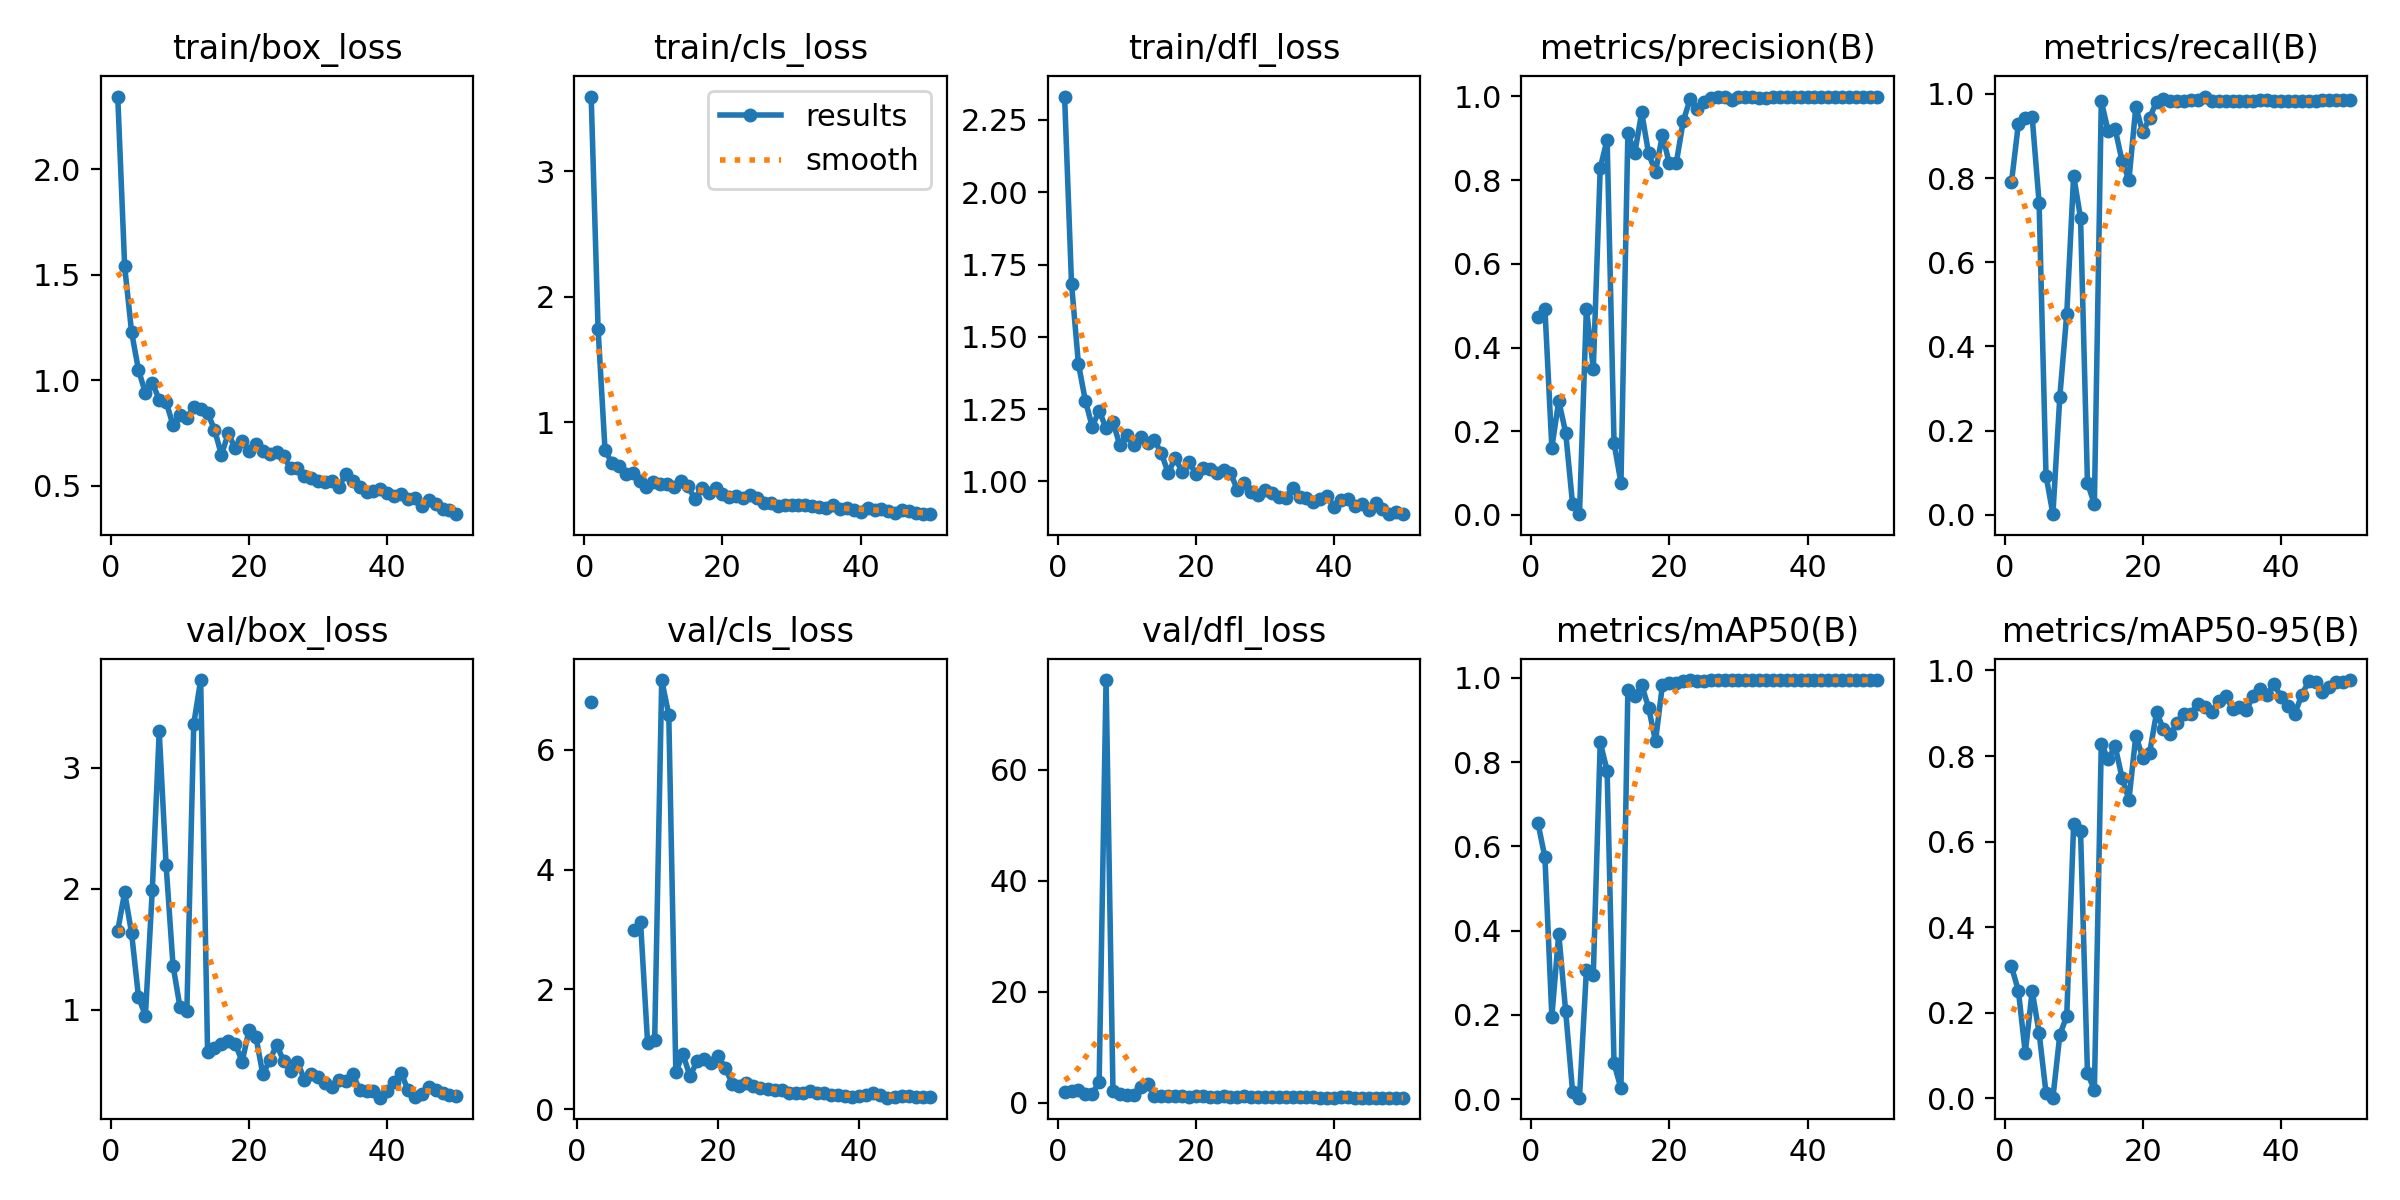

In [15]:
%cd Park
Image(filename=f'/content/Park/runs/detect/train3/results.png', width=600)

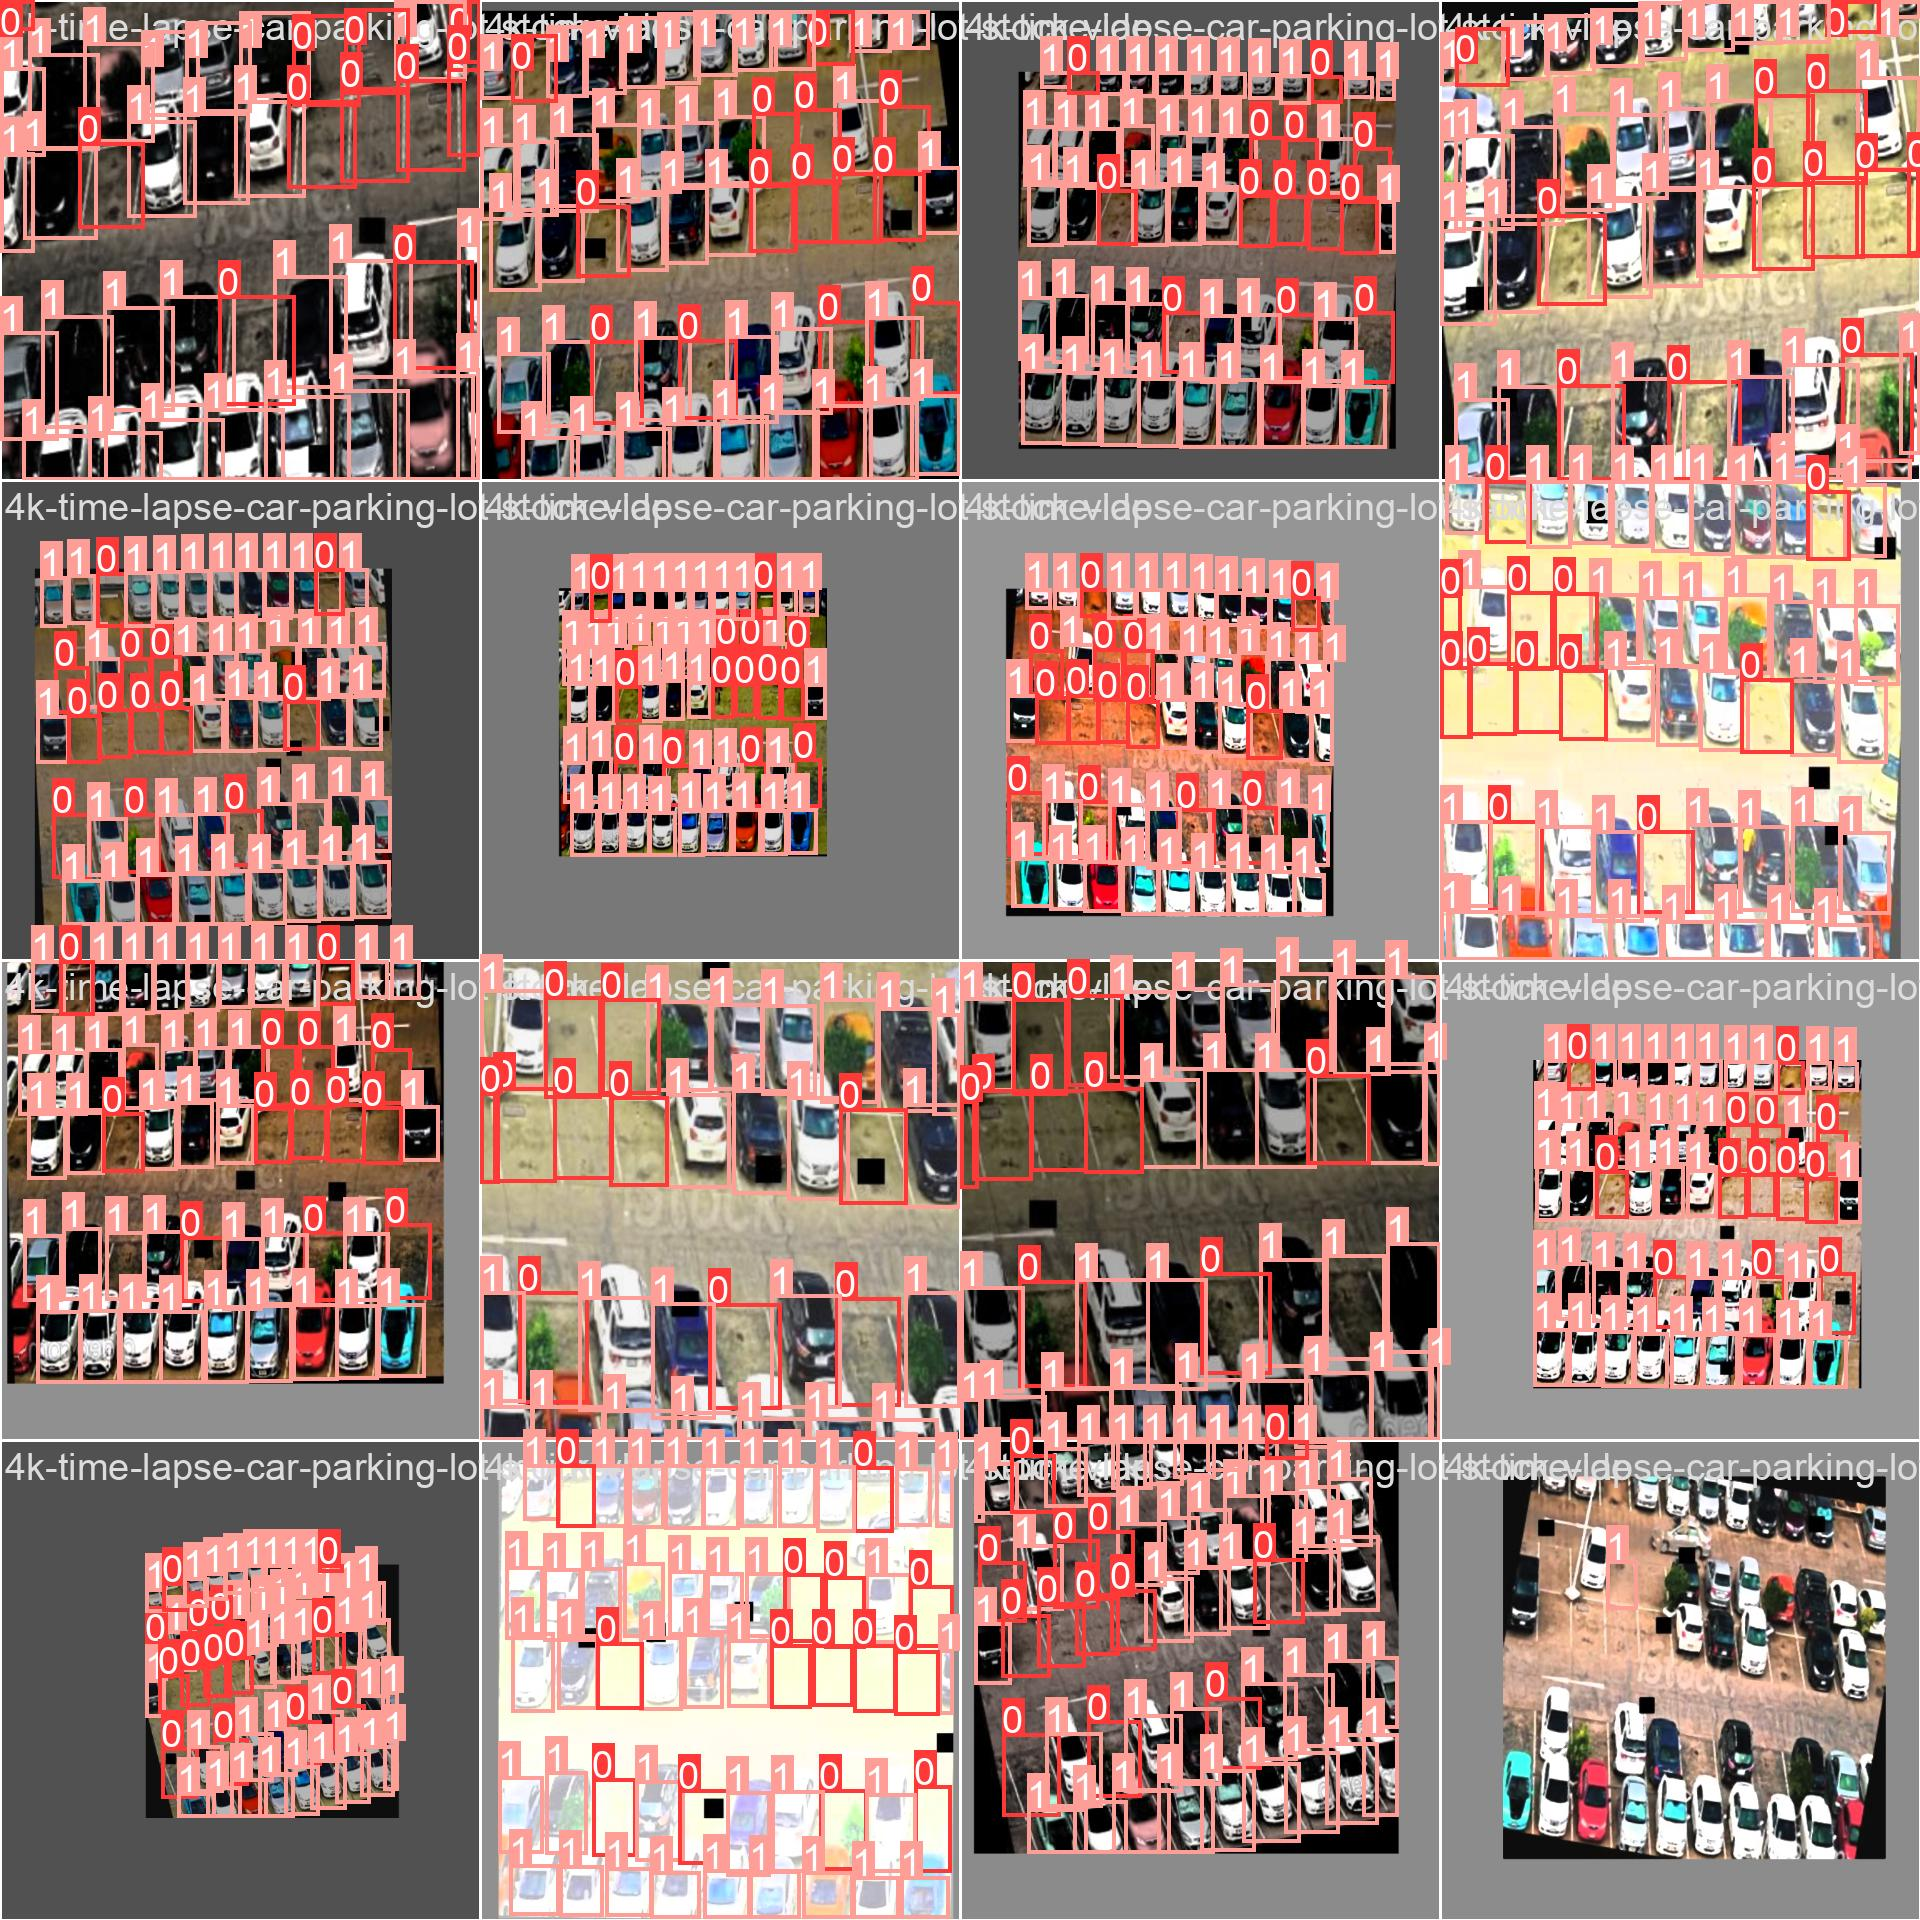

In [16]:
Image(filename=f'/content/Park/runs/detect/train3/train_batch282.jpg', width=600)

# **Validating Model**

In [23]:
!yolo task=detect mode=val model=/content/Park/runs/detect/train3/weights/best.pt data=/content/Park/parking-lot-5/data.yaml

Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/Park/parking-lot-5/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.44s/it]
                   all         10        530      0.998      0.986      0.995      0.978
                 empty         10        133          1      0.984      0.995      0.991
              occupied         10        397      0.996      0.987      0.995      0.965
Speed: 2.2ms preprocess, 75.5ms inference, 0.0ms loss, 46.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


# **Inference with the Model**

In [26]:
!yolo task=detect mode=predict model=/content/Park/runs/detect/train3/weights/best.pt conf=0.25 source=/content/parkings.jpeg save=True

Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /content/parkings.jpeg: 480x672 1 empty, 3 occupieds, 95.7ms
Speed: 3.2ms preprocess, 95.7ms inference, 512.1ms postprocess per image at shape (1, 3, 480, 672)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


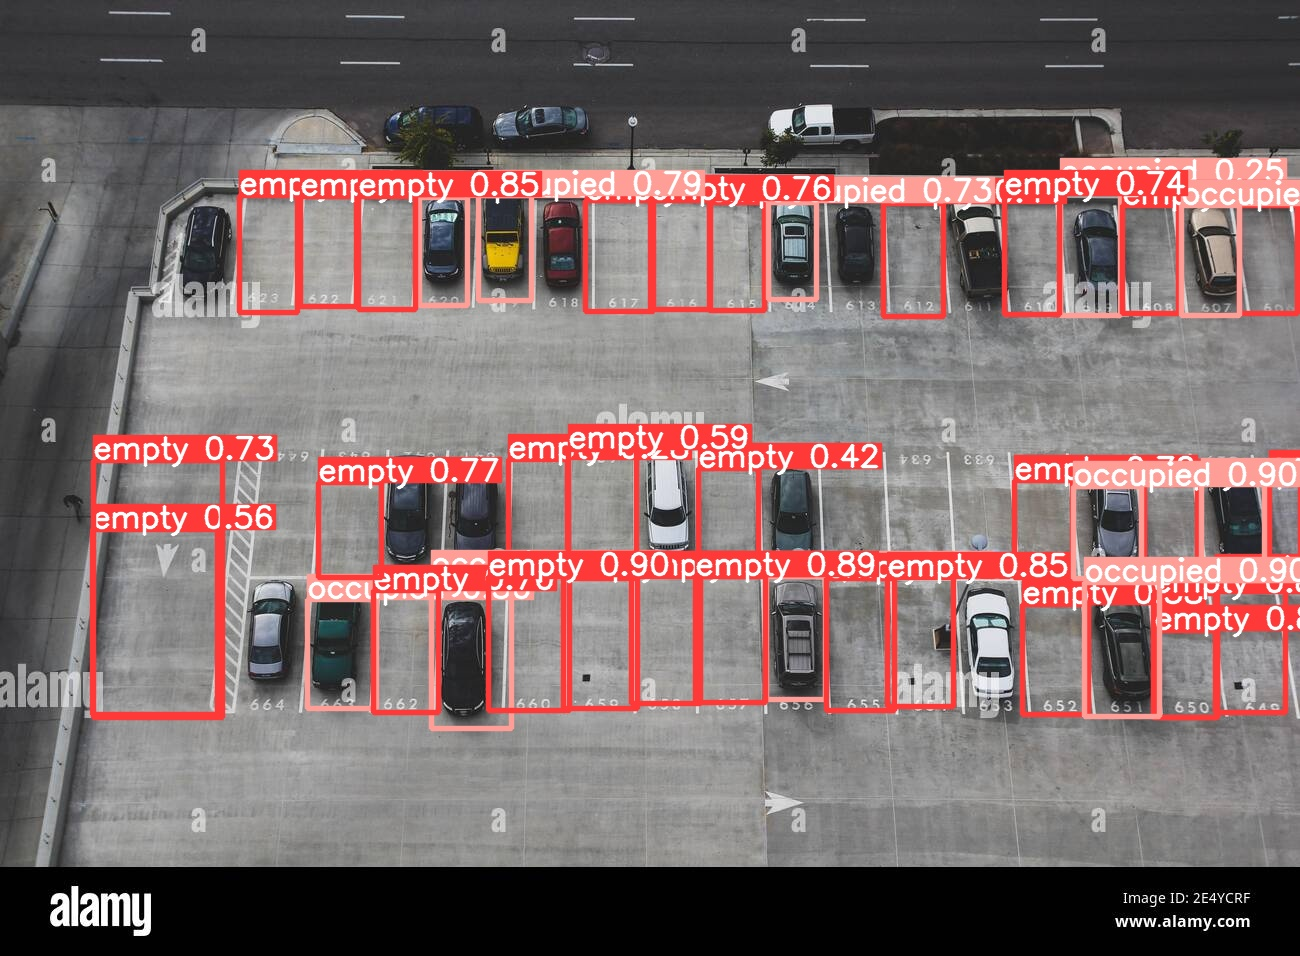

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/Park/runs/detect/predict2/Car.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")